# Dust Mite Population Dynamics Simulation

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Determining the Growth Rate

In [0]:
number_of_months = 100
mite_population = np.zeros(number_of_months)
mite_population[0] = 2                                                       ###starting off with only 2 mites a male and female
for i in range(number_of_months - 1):     
  mite_population[i + 1] = .5*mite_population[i] + 79*.5*mite_population[i]  #### a female mite lays 80 eggs over the course of two months
                                                                             #### the model assumes an equal sex ratio of 0.5
                                                                             #### males die after mating every month the female outlives 
                                                                             #### the male by a month



Text(0.5, 1.0, 'Population vs. Time')

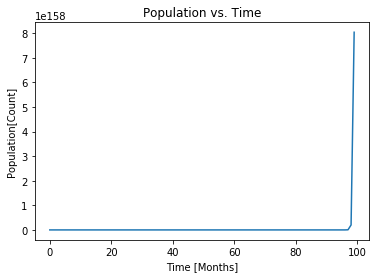

In [4]:
plt.plot(mite_population)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Population[Count]')
plt.xlabel('Time [Months]')
plt.title('Population vs. Time')

Text(0.5, 1.0, 'Log Population vs. Time')

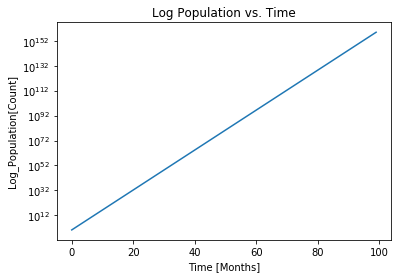

In [5]:
plt.plot(mite_population)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Log_Population[Count]')
plt.xlabel('Time [Months]')
plt.title('Log Population vs. Time')

In [6]:
r = (np.log(mite_population[29]) - np.log(mite_population[18]))/11
r

3.688879454113937

#### Checking the growth rate estimate

In [7]:
2*np.exp(r*20)

2.1990232555520252e+32

In [8]:
mite_population[20]

2.199023255552e+32

### Determining the Carrying Capacity

#### Food Based Carrying Capacity

In [9]:
(12*0.58)/(.0000015)

4639999.999999999

### Relative Rates

In [10]:
for initial_mite in np.arange(2,1000, 2):  
  dt = 1/30              #time intervals set to 1/30 of a month or one day
  mite_rate = .0000015
  k = 4640000
  x = [initial_mite*mite_rate]             # the consumption rate of the mites
  y = [initial_mite]             # number of starting mites (population array)
  z = [12*0.58]             # number of starting g of dead skin (food array)
  t = [0]                   #initializing the time point at 0
  while y[-1] < k-1:  #designed to stop around the carrying capacity since we know it will plateau there
    y += [(y[-1] + (r*y[-1]*(1-y[-1]/k)*dt))]   #recursive logisitc definition of y_t+1 usign y_t and the growth rate dN/dt
    x += [y[-1]*mite_rate]                         #keeping track of time consumption rate
    z += [z[-1] + 12*.58 - x[-1]]                 #keeping track of the skin generated minus skin consumed
    t += [t[-1]+dt]                                #keeping track of the time
  if all(i < 704.52 for i in z):                    #ensuring the threshold is never crossed
    print(initial_mite)                             #returning the value of the intial amount
    break  

36


Text(0.5, 1.0, 'Skin Cell Production vs. Consumption Amounts')

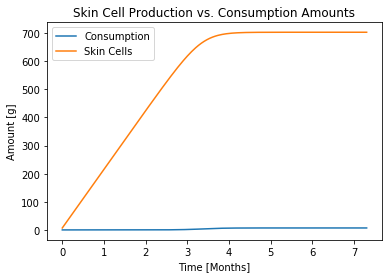

In [11]:
plt.plot(t,x)
#plt.plot(y)
plt.plot(t,z)
plt.legend(['Consumption', 'Skin Cells'])
plt.xlabel('Time [Months]')
plt.ylabel('Amount [g]')
plt.title('Skin Cell Production vs. Consumption Amounts')

Text(0.5, 1.0, 'Population Growth of Mites in Space')

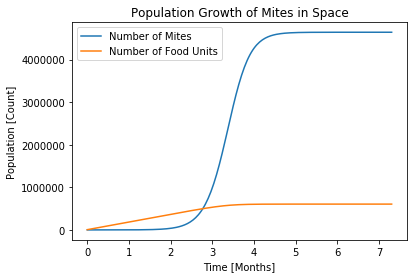

In [22]:
plt.plot(t, y)
plt.plot(t, [i*862 for i in z])   #here the 862 is the number of cells that a mite eats in a day so its a conversion of grams to cells
plt.xlabel('Time [Months]')
plt.legend(['Number of Mites', 'Number of Food Units'])
plt.ylabel('Population [Count]')
plt.title('Population Growth of Mites in Space')